In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install pandas_datareader
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install interpret
!{sys.executable} -m pip install sklearn

,sensitivity,shap,skoperules,treeinterpreter]>=0.2.6->interpret) (1.3.1)
  Using cached shap-0.39.0.tar.gz (356 kB)
  Using cached skope_rules-1.0.1-py3-none-any.whl (14 kB)
  Using cached treeinterpreter-0.2.3-py2.py3-none-any.whl (6.0 kB)
  Using cached psutil-5.8.0-cp39-cp39-win_amd64.whl (246 kB)
  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Using cached gevent-21.1.2-cp39-cp39-win_amd64.whl (1.6 MB)
  Using cached dash_cytoscape-0.3.0-py3-none-any.whl (3.6 MB)
  Using cached dash-1.21.0.tar.gz (1.1 MB)
  Using cached dash_table-4.12.0.tar.gz (1.8 MB)
  Using cached Flask_Compress-1.10.1-py3-none-any.whl (7.9 kB)
  Using cached dash_core_components-1.17.1.tar.gz (3.7 MB)
  Using cached dash_html_components-1.1.4.tar.gz (83 kB)
  Using cached future-0.18.2.tar.gz (829 kB)
  Using cached cffi-1.14.6-cp39-cp39-win_amd64.whl (180 kB)
  Using cached zope.interface-5.4.0-cp39-cp39-win_amd64.whl (210 kB)
  Using cached zope.event-4.5.0-py2.py3-none-any.whl (6.8 kB)
  Using cached greenlet

In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.521944
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.828764
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,28.083660
2017-01-10,29.844999,29.575001,29.692499,29.777500,97848400.0,28.111979
2017-01-11,29.982500,29.650000,29.684999,29.937500,110354400.0,28.263029


In [3]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

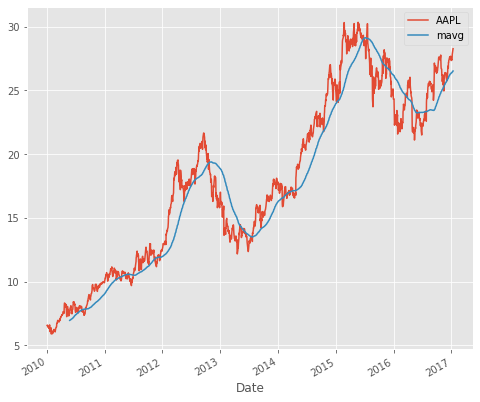

In [4]:
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

In [5]:
from sklearn.model_selection import train_test_split

train_cols = df.columns[0:-1]
label = df.columns[-1]
X = df[train_cols]
y = df[label]

seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

# X Values

In [6]:
print(X)

print(X_train)

                 High        Low       Open      Close       Volume
Date                                                               
2010-01-04   7.660714   7.585000   7.622500   7.643214  493729600.0
2010-01-05   7.699643   7.616071   7.664286   7.656429  601904800.0
2010-01-06   7.686786   7.526786   7.656429   7.534643  552160000.0
2010-01-07   7.571429   7.466071   7.562500   7.520714  477131200.0
2010-01-08   7.571429   7.466429   7.510714   7.570714  447610800.0
...               ...        ...        ...        ...          ...
2017-01-05  29.215000  28.952499  28.980000  29.152500   88774400.0
2017-01-06  29.540001  29.117500  29.195000  29.477501  127007600.0
2017-01-09  29.857500  29.485001  29.487499  29.747499  134247600.0
2017-01-10  29.844999  29.575001  29.692499  29.777500   97848400.0
2017-01-11  29.982500  29.650000  29.684999  29.937500  110354400.0

[1769 rows x 5 columns]
                 High        Low       Open      Close       Volume
Date                   

# Y Values

In [7]:
print(y)

print(y_train)

Date
2010-01-04     6.572422
2010-01-05     6.583784
2010-01-06     6.479061
2010-01-07     6.467082
2010-01-08     6.510078
                ...    
2017-01-05    27.521944
2017-01-06    27.828764
2017-01-09    28.083660
2017-01-10    28.111979
2017-01-11    28.263029
Name: Adj Close, Length: 1769, dtype: float64
Date
2016-06-15    22.686680
2013-06-21    12.971660
2015-09-24    26.438042
2015-06-02    29.742664
2013-02-26    13.991755
                ...    
2012-11-05    18.031242
2013-08-08    14.557558
2014-05-13    19.077789
2010-12-08     9.858478
2014-03-24    17.228205
Name: Adj Close, Length: 1415, dtype: float64


In [8]:
from interpret.glassbox import ExplainableBoostingRegressor, LinearRegression, RegressionTree

ebm = ExplainableBoostingRegressor(random_state=seed)
ebm.fit(X_train, y_train)

ExplainableBoostingRegressor(feature_names=['High', 'Low', 'Open', 'Close',
                                            'Volume', 'Open x Volume',
                                            'High x Volume', 'Low x Volume',
                                            'Close x Volume', 'Open x Close',
                                            'High x Open', 'Low x Close',
                                            'High x Close', 'Low x Open',
                                            'High x Low'],
                             feature_types=['continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction',
                                            'interaction', 'interaction',
                                            'interac

In [9]:
from interpret import show
from interpret.data import Marginal

marginal = Marginal().explain_data(X_train, y_train, name = 'Train Data')
show(marginal)

<!-- http://127.0.0.1:7001/1693969049680/ -->

In [10]:
from interpret import show

ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

<!-- http://127.0.0.1:7001/1694223612944/ -->

In [11]:
from interpret.glassbox import LinearRegression, RegressionTree

lr = LinearRegression(random_state=seed)
lr.fit(X_train, y_train)

rt = RegressionTree(random_state=seed)
rt.fit(X_train, y_train)

In [12]:
from interpret.perf import RegressionPerf

ebm_perf = RegressionPerf(ebm.predict).explain_perf(X_test, y_test, name='EBM')
show(ebm_perf)

<!-- http://127.0.0.1:7001/1694259476032/ -->

In [13]:
lr_perf = RegressionPerf(lr.predict).explain_perf(X_test, y_test, name='Linear Regression')
rt_perf = RegressionPerf(rt.predict).explain_perf(X_test, y_test, name='Regression Tree')

show(lr_perf)
show(rt_perf)
show(ebm_perf)

<!-- http://127.0.0.1:7001/1694224021344/ -->

<!-- http://127.0.0.1:7001/1694259295088/ -->

<!-- http://127.0.0.1:7001/1694259476032/ -->

In [14]:
lr_global = lr.explain_global(name='Linear Regression')
rt_global = rt.explain_global(name='Regression Tree')

show(lr_global)
show(rt_global)
show(ebm_global)

<!-- http://127.0.0.1:7001/1694259478336/ -->

<!-- http://127.0.0.1:7001/1694259896768/ -->

<!-- http://127.0.0.1:7001/1694223612944/ -->

In [15]:
show([lr_global, lr_perf, rt_global, rt_perf, ebm_global, ebm_perf])

<!-- http://127.0.0.1:7001/1694225675456/ -->
 Open in new window